Terminal comamnds for training new MVA for specific categories


In [ ]:
# use --vbf flag if you want to train with VBF production category, if not then ggH category is chosen
# ! python my_trainer_withWeight_gpu.py --name WgtOff_includeQGL
# ! nohup python my_trainer_withWeight_gpu.py --name test &> output.log
# ! python my_trainer_withWeight_gpu.py --name WgtON_original_AN_BDT --year 2018
# ! python my_trainer_withWeight_gpu.py --name WgtON_original_AN_BDT_DyOnly --year 2018
# ! python my_trainer_withWeight_gpu.py --name WgtON_original_AN_BDT_DyOnly_noDimuRap --year 2018
# ! nohup python my_trainer_withWeight_gpu.py --name WgtON_original_AN_BDT_Sept27 --year 2017 &> output2017.log
# ! nohup python my_trainer_withWeight_gpu.py --name WgtON_original_AN_BDT_noDimuRap_Sept27 --year 2016preVFP &> out2016pre.log
# ! python my_trainer_withWeight_gpu.py --name test --year 2018 
# ! python my_trainer_withWeight_gpu.py --name WgtON_original_AN_BDT_Sept29 --year 2018 
# ! python my_trainer_withWeight_gpu.py --name PhiFixed_rereco_yun --year 2016 -load /depot/cms/users/yun79/hmm/copperheadV1clean/DmitryMaster_JECoff_GeofitFixed_Nov01/stage1_output/

# model_name = "V2_UL_Jan18_2025"
model_name = "V2_UL_Jan19_2025_addTTST"
! python my_trainer_withWeight_gpu.py --name {model_name} --year 2018 -load  /depot/cms/users/yun79/hmm/copperheadV1clean/V2_Jan17_JecDefault_valerieZpt/stage1_output
# ! python my_trainer_withWeight_gpu.py --name V2_UL_Jan18_2025_NoEtaFrame --year 2018 -load  /depot/cms/users/yun79/hmm/copperheadV1clean/V2_Jan17_JecDefault_valerieZpt/stage1_output


/depot/cms/kernels/root632/lib/python3.12/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 39241 instead
  warnings.warn(
load_path: /depot/cms/users/yun79/hmm/copperheadV1clean/V2_Jan17_JecDefault_valerieZpt/stage1_output/2018/f1_0
sample_l: ['dy_M-100To200', 'ttjets_dl', 'ttjets_sl', 'st_tw_top', 'st_tw_antitop', 'ggh_powhegPS', 'vbf_powheg_dipole']
training_features: ['dimuon_cos_theta_cs', 'dimuon_phi_cs', 'dimuon_rapidity', 'dimuon_pt', 'jet1_eta', 'jet1_pt', 'jet2_pt', 'jj_dEta', 'jj_dPhi', 'jj_mass', 'mmj1_dEta', 'mmj1_dPhi', 'mmj_min_dEta', 'mmj_min_dPhi', 'mu1_eta', 'mu1_pt_over_mass', 'mu2_eta', 'mu2_pt_over_mass', 'zeppenfeld', 'njets']
category_selection: [False, False, True, False, True, False, ..., False, False, False, False, False]
computed_zip : [{mmj2_dEta_nominal: None, mu2_pt_over_mass: 0.333, ...}, {...}, ..., {...}]
df :    mmj2_dEta_nominal  ...  mmj_min_dPh

In [6]:
year = "2017"
! python my_trainer_withWeight_gpu.py --name {model_name} --year {year} -load  /depot/cms/users/yun79/hmm/copperheadV1clean/V2_Jan17_JecDefault_valerieZpt/stage1_output

year = "2016preVFP"
! python my_trainer_withWeight_gpu.py --name {model_name} --year {year} -load  /depot/cms/users/yun79/hmm/copperheadV1clean/V2_Jan17_JecDefault_valerieZpt/stage1_output



/depot/cms/kernels/root632/lib/python3.12/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 34645 instead
  warnings.warn(
load_path: /depot/cms/users/yun79/hmm/copperheadV1clean/V2_Jan17_JecDefault_valerieZpt/stage1_output/2017/f1_0
sample_l: ['dy_M-100To200', 'ggh_powhegPS', 'vbf_powheg_dipole']
training_features: ['dimuon_cos_theta_cs', 'dimuon_phi_cs', 'dimuon_rapidity', 'dimuon_pt', 'jet1_eta', 'jet1_pt', 'jet2_pt', 'jj_dEta', 'jj_dPhi', 'jj_mass', 'mmj1_dEta', 'mmj1_dPhi', 'mmj_min_dEta', 'mmj_min_dPhi', 'mu1_eta', 'mu1_pt_over_mass', 'mu2_eta', 'mu2_pt_over_mass', 'zeppenfeld', 'njets']
category_selection: [False, False, False, False, True, True, ..., False, False, False, False, False]
computed_zip : [{jj_dEta_nominal: 1.05, dimuon_mass: 115, mu2_pt_over_mass: 0.466, ...}, ...]
df :    jj_dEta_nominal  dimuon_mass  ...  dimuon_phi_cs  dimuon_ebe_mass_res
0         1.050537 

In [3]:
! ls /depot/cms/users/yun79/hmm/copperheadV1clean/V2_Jan17_JecDefault_valerieZpt/stage1_output

total 79
drwxr-s---+ 3 yun79 18951 4096 Apr 11  2024 test_validation
drwxr-s---+ 3 yun79 18951 4096 Apr 14  2024 test_validation_bigV1_12April2024
drwxr-s---+ 3 yun79 18951 4096 Apr 15  2024 test_validation_bigV1_12April2024_w_HEMVeto
drwxr-s---+ 3 yun79 18951 4096 May 11  2024 test_validation_QglAndBtagOff
drwxr-s---+ 3 yun79 18951 4096 May 11  2024 test_validation_noRochester
drwxr-s---+ 3 yun79 18951 4096 May 18  2024 test_validation_bigV1_18May2024_minDetaDPhiFixed
drwxr-s---+ 3 yun79 18951 4096 May 20  2024 cs_varTest
drwxr-s---+ 3 yun79 18951 4096 Oct 25 00:54 test_Oct24
drwxr-s---+ 3 yun79 18951 4096 Oct 25 01:38 RERECO_Oct24
drwxr-s---+ 3 yun79 18951 4096 Oct 25 20:03 DmitryMaster_w_centralRERECO_Oct25
drwxr-s---+ 3 yun79 18951 4096 Oct 28 16:27 DmitryMaster_testJECoff_Oct28
drwxr-s---+ 7 yun79 18951 4096 Oct 28 17:53 DmitryMaster_Oct24
drwxr-s---+ 3 yun79 18951 4096 Oct 28 18:02 mitryMaster_Oct24
drwxr-s---+ 7 yun79 18951 4096 Nov  1 18:43 DmitryMaster_JECoff_GeofitFixed_Nov01

In [2]:
! ls /depot/cms/users/yun79/hmm/copperheadV1clean/DmitryMaster_JECoff_GeofitFixed_Nov01/stage1_output/

2016  2017  2018


In [66]:
import pandas as pd

year=2018
df = pd.read_pickle(f"/depot/cms/hmm/vscheure/training_dataset_ggHnew_{year}.pickle")
df.head()

,LHEMass,dataset,dimuon_cos_theta_cs,dimuon_cos_theta_cs_pisa,dimuon_dEta,dimuon_dPhi,dimuon_dR,dimuon_ebe_mass_res,dimuon_ebe_mass_res_raw,dimuon_ebe_mass_res_rel,...,wgt_btag_wgt_nominal,wgt_genwgt_nominal,wgt_lumi_nominal,wgt_nominal,wgt_puid_wgt_nominal,wgt_zpt_wgt_nominal,year,zeppenfeld_nominal,zpt_weight,wgt_nnlops_nominal
entry,,,,,,,,,,,,,,,,,,,,,
35,0,dy_M-100To200,-0.490426,-0.492034,1.073242,2.954938,3.143805,1.620307,1.487324,0.015873,...,1.048492,0.111266,0.000107,0.111266,1.048492,1.048823,2018,NaN,1.048823,NaN
43,0,dy_M-100To200,-0.516126,0.517496,1.142090,2.840070,3.061105,1.619456,1.373690,0.014708,...,1.124836,-0.120647,0.000116,-0.120647,1.122005,1.125193,2018,NaN,1.125193,NaN
80,0,dy_M-100To200,-0.084984,0.088725,0.170380,2.548322,2.554011,1.331674,1.122277,0.009647,...,0.922364,0.097044,0.000093,0.097044,0.922364,0.922656,2018,NaN,0.922656,NaN
92,0,dy_M-100To200,0.262741,-0.315394,0.538101,1.641584,1.727527,1.924615,1.621981,0.013208,...,0.888915,0.098275,0.000094,0.098275,0.888915,0.969637,2018,NaN,0.969637,NaN
102,0,dy_M-100To200,0.649947,-0.634253,1.550415,2.382306,2.842388,1.036863,0.822187,0.011827,...,0.962957,0.114701,0.000110,0.114701,0.919403,0.968569,2018,2.268408,0.968569,NaN


In [3]:
import awkward as ak
import dask_awkward as dak
import copy
import pandas as pd

path = "/depot/cms/users/yun79/hmm/copperheadV1clean/DmitryMaster_JECoff_GeofitFixed_Nov01/stage1_output//2016/dy_m105_160_amc"
events = ak.from_parquet(f"{path}/0073360f1c1537cb5c7d3984765f88bb.parquet")
fields = copy.deepcopy(events.fields)
fields.remove("dataset")
ak_dict = {field: list(events[field]) for field in fields}
df_ak = pd.DataFrame(ak_dict)
# df_ak = ak.to_dataframe(events)

In [ ]:
df_ak

In [78]:
# events.fields
# type(ak.to_dataframe(events.dataset))
list(events.dataset)

AttributeError: no field named 'dataset'

In [28]:
! ls /depot/cms/users/yun79/hmm/copperheadV1clean/DmitryMaster_JECoff_GeofitFixed_Nov01/stage1_output//2018/

data_A		     ewk_lljj_mll105_160_ptj0	    ttjets_dl	       wz_2l2q
data_B		     ewk_lljj_mll105_160_py_dipole  ttjets_sl	       wz_3lnu
data_C		     ggh_amcPS			    vbf_powheg_dipole  zz
data_D		     ggh_powhegPS		    vbf_powheg_herwig
dy_m105_160_amc      st_tw_antitop		    vbf_powhegPS
dy_m105_160_vbf_amc  st_tw_top			    ww_2l2nu


In [65]:
! ls /depot/cms/users/yun79/hmm/trained_MVAs/bdt_test_2018

scalers_test_2018_0.npy  scalers_test_2018_3.npy  test_2018_2.pkl
scalers_test_2018_1.npy  test_2018_0.pkl	  test_2018_3.pkl
scalers_test_2018_2.npy  test_2018_1.pkl


In [72]:
! ls /depot/cms/users/yun79/hmm/trained_MVAs/bdt_WgtOff_includeQGL_2018

scalers_WgtOff_includeQGL_2018_0.npy  WgtOff_includeQGL_2018_0.pkl
scalers_WgtOff_includeQGL_2018_1.npy  WgtOff_includeQGL_2018_1.pkl
scalers_WgtOff_includeQGL_2018_2.npy  WgtOff_includeQGL_2018_2.pkl
scalers_WgtOff_includeQGL_2018_3.npy  WgtOff_includeQGL_2018_3.pkl


In [94]:
stage2_save_path = "/work/users/yun79/stage2_output/BDT_test_WgtON_original_AN_BDT_DyOnly_AllSigNBkg_NewBDTedges20Sept2024" # path where stage2 output is saved 
import awkward as ak
events = ak.from_parquet(stage2_save_path + "/ggh/2018/processed_events_bkgMC*.parquet")
# events = ak.from_parquet(stage2_save_path + "/ggh/2018/processed_events_sigMC_ggh.parquet")

not_identical = ak.sum(events.subCategory_idx != events.subCategory_idx_val)
rate = not_identical/len(events.subCategory_idx)
print(rate)
print(ak.sum(events.subCategory_idx ==0))
print(ak.sum(events.subCategory_idx_val ==0))

0.2667076541487307
3976748
3978301


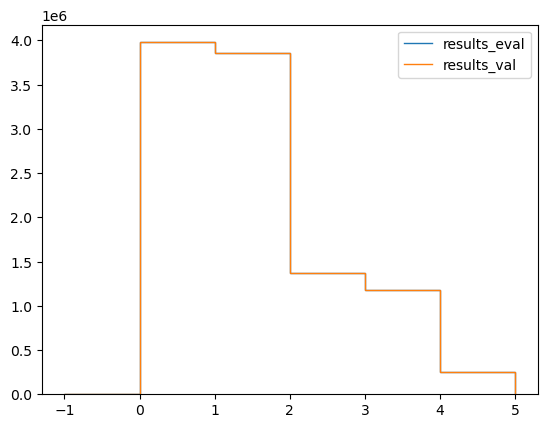

In [84]:
import numpy as np
import matplotlib.pyplot as plt
events = ak.from_parquet(stage2_save_path + "/ggh/2018/processed_events_bkgMC*.parquet")
# events = ak.from_parquet(stage2_save_path + "/ggh/2018/processed_events_sigMC_ggh.parquet")
binning = np.linspace(-1,5,7)
results_eval, edges = np.histogram(events.subCategory_idx ,bins=binning)
plt.stairs(results_eval, edges=edges, label="results_eval")
results_val, edges = np.histogram(events.subCategory_idx_val ,bins=binning)
plt.stairs(results_val, edges=edges, label="results_val")
plt.legend()
plt.show()

In [68]:
! ls /work/users/yun79/stage2_output/BDT_test_WgtON_original_AN_BDT_DyOnly_AllSigNBkg_NewBDTedges20Sept2024/ggh/2018

processed_events_bkgMC_dy.parquet   processed_events_data.parquet
processed_events_bkgMC_ewk.parquet  processed_events_sigMC_ggh.parquet
processed_events_bkgMC_st.parquet   processed_events_sigMC_vbf.parquet
processed_events_bkgMC_tt.parquet


In [ ]:
stage